# MA3001B


In [1]:
#!pip install pytsdatasets

In [2]:
#import pytsdatasets as tsds
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 5.5.6 SARIMA MODELS (Seasonal ARIMA)

Seasonal ARIMA models (SARIMA) add seasonal components to an ARIMA model. Given an ARIMA(p,d,q):

$\phi(B)(1-B)^dX_t=\theta(B)Z_t$

with:

$\phi(B)=1-\phi_1B-\phi_2B^2-...-\phi_pB^p$

$\theta(B)=1+\theta_1B+\theta_2B^2+...+\theta_qB^q$

Seasonality can induce periodic autocorrelations in the process. For example, if a yearly periodicity is observed, the process at current month of january can be autocorrelated to the process of january of last year.


## Seasonal $ARMA(P,Q)_S$ processes

We consider an index $s$ for seasonality such that:

$\Gamma_P(B^s)X_t=\Psi_P(B^s)Z_t$

$\Gamma_P(B^s)=1-\Gamma_1B^s-\Gamma_2B^{2s}-...-\Gamma_PB^{Ps}$

$\Psi_Q(B^s)=1+\Psi_1B^s+\Psi_2B^{2s}+...+\Psi_QB^{Qs}$

As an example, the $ARMA(1,0)_{12}$ process is:

$(1-\Gamma_1B^{12})X_t=Z_t$

$X_t=\Gamma_1X_{t-12}+Z_t$

So the process at time $t$ depends on the process at time $t-12$ and on the noise at actual time.

## SARIMA(p,d,q,P,D,Q) MODELS

A seasonal ARIMA process SARIMA(p,d,q,P,D,Q) has the form:

$\Gamma_P(B^s)\phi_p(B)(1-B^s)^D(1-B)^dX_t=\Psi_Q(B^s)\theta_q(B)Z_t$

where:

$\Gamma_P(B^s)=1-\Gamma_1B^s-\Gamma_2B^{2s}-...-\Gamma_PB^{Ps}$

$\Psi_Q(B^s)=1+\Psi_1B^s+\Psi_2B^{2s}+...+\Psi_QB^{Qs}$

$\phi_p(B)=1-\phi_1B-\phi_2B^2-...-\phi_pB^p$

$\theta_q(B)=1+\theta_1B+\theta_2B^2+...+\theta_qB^q$

In these kind of processes, we take into account autoregressive processes and seasonal autoregressive processes, as well as moving average processes and seasonal moving average processes.
The parameter $D$ refers to the order of differencing of the seasonal ARIMA process. If $D=1$

$\nabla_s X_t=(1-B^s)^1X_t=X_{t-s}$

If $D=2$:

$\nabla_s^2X_t=(1-B^s)^2X_t=(1-2B^s+B^{2s})X_t=X_t-2X_{t-s}+X_{t-2s}$

As an example, the process $SARIMA(1,0,0,1,0,1)_{12}$ is:

$(1-\phi_1B)(1-\Gamma_1B^{12})X_t=(1+\Psi_1B^{12})Z_t$

$(1-\phi_1B+\phi_1\Gamma_1B^{13}-\Gamma_1B^{12})X_t=Z_t+\Psi_1Z_{t-12}$

Which can be written as:

$X_t=Z_t+\Psi_1Z_{t-12}+\phi_1X_{t-1}+\phi_1\Gamma_1X_{t-13}+\phi_1X_{t-12}$

## ACF of a SARIMA model

We simulate the process $SARIMA(0,0,1,0,0,1)_{12}$:

$X_t=(1+\Psi_1B^{12})(1+\theta_1B)Z_t$

$X_t=Z_t+\theta_1Z_{t-1}+\Psi_1Z_{t-12}+\theta_1\Psi_1Z_{t-13}$

We choose $\theta_1=0.7$ and $\Gamma_1=0.6$.


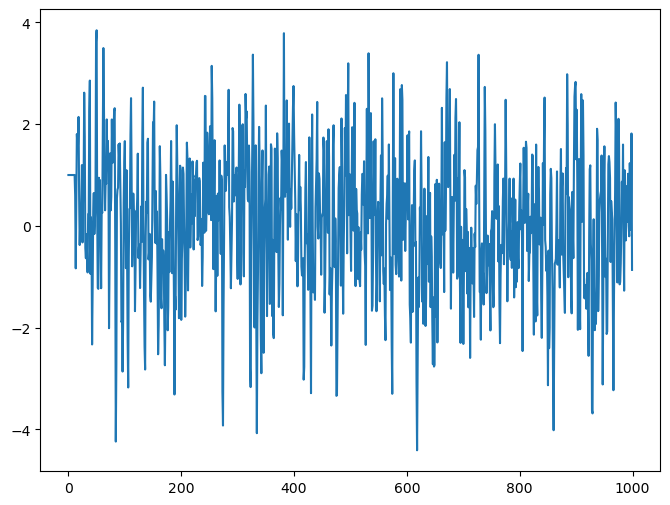

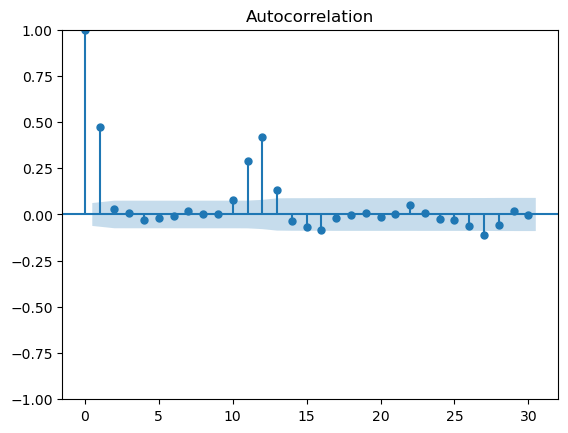

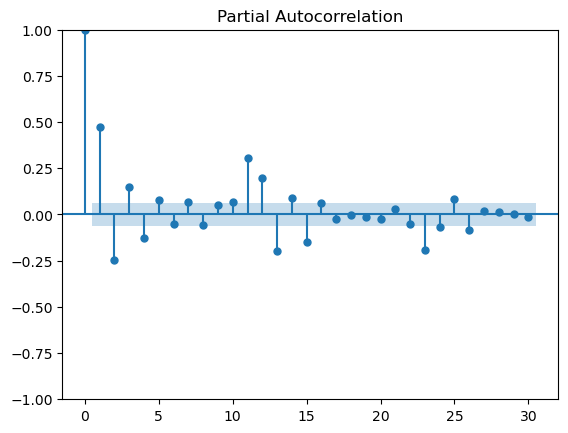

In [3]:
n = 1000
x = np.zeros(n)
z= np.zeros(n)

z = np.random.normal(0,1,n)

x[0:12]=1

for i in range(12,n):
    x[i]=z[i]+0.7*z[i-1]+0.6*z[i-12]+0.42*z[i-13]

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(x)
plot_acf(x)
plot_pacf(x)
plt.show()

The ACF plot shows the moving average MA(1) at lag 1, but also other significative coefficients centered at lag 12. The coefficients at lags 12 and 13 are expected, since in the process do appear terms in $Z_{t-12}$ and $Z_{t-13}$. We can notice that also a term at lag 11 appears. We can understand why by calculating the autocorrelation coefficients:

* $\gamma(0)=Cov(X_t,X_t)=Var(X_t)$

$Var(X_t)=Var(Z_t+\theta_1Z_{t-1}+\Psi_1Z_{t-12}+\theta_1\Psi_1Z_{t-13})=$

$=\sigma_Z^2+\theta_1^2\sigma_Z^2+\Psi_1^2\sigma_Z^2+\theta_1^2\Psi_1^2\sigma_Z^2$

$\gamma(0)=(1+\theta_1^2)(1+\Psi_1^2)\sigma_Z^2$

* $\gamma(1)=Cov(X_t,X_{t-1})$

$X_t=Z_t+\theta_1Z_{t-1}+\Psi_1Z_{t-12}+\theta_1\Psi_1Z_{t-13}$

$X_{t-1}=Z_{t-1+}\theta_1Z_{t-2}+\Psi_1Z_{t-13}+\theta_1\Psi_1Z_{t-14}$

Between $X_t$ and $X_{t-1}$ only the terms with process Z at the same lags are correlated, i.e. at lags $t-1$ and $t-13$:

$\gamma(1)=\theta_1\sigma_Z^2+\theta_1\Psi_1^2\sigma_Z^2=\theta_1(1+\Psi_1^2)\sigma_Z^2$

$\rho(1)=\frac{\gamma(0)}{\gamma(1)}=\frac{\theta_1}{1+\theta_1^2}\le\frac{1}{2}$

* $\gamma(2)=Cov(X_t,X_{t-2})$

$X_t=Z_t+\theta_1Z_{t-1}+\Psi_1Z_{t-12}+\theta_1\Psi_1Z_{t-13}$

$X_{t-2}=Z_{t-2}\theta_1Z_{t-3}+\Psi_1Z_{t-14}+\theta_1\Psi_1Z_{t-15}$

Since the $Z_t$ are independent and there are not terms in common at the same lags, the covariance is 0 and then also $\gamma(2)=0$ and $\rho(2)=0$.

One can show that:

$\rho(i)=0$  for i=2,3,...,10.

At lag 11:

* $\gamma(11)=Cov(X_t,X_{t-11})$

$X_t=Z_t+\theta_1Z_{t-1}+\Psi_1Z_{t-12}+\theta_1\Psi_1Z_{t-13}$

$X_{t-11}=Z_{t-11}\theta_1Z_{t-12}+\Psi_1Z_{t-23}+\theta_1\Psi_1Z_{t-24}$

There is the common term $Z_{t-12}$:

$\gamma(11)=Cov(X_t,X_{t-12})=\theta_1\Psi_1\sigma_Z^2$

$\rho(11)=\frac{\gamma(11)}{\gamma(0)}=\frac{\theta_1\Psi_1}{(1+\theta_1^2)(1+\Psi_1^2)}\ne 0$

and:

$0\le \gamma(11)\le \frac{1}{4}$

## Practical Example: SARIMA model applied to J & J dataset

In [5]:
data = pd.read_csv("Johnson&Johnson.csv")
data.reset_index(inplace=True)
data['date']=data['date'].astype('str')



KeyError: 'date'

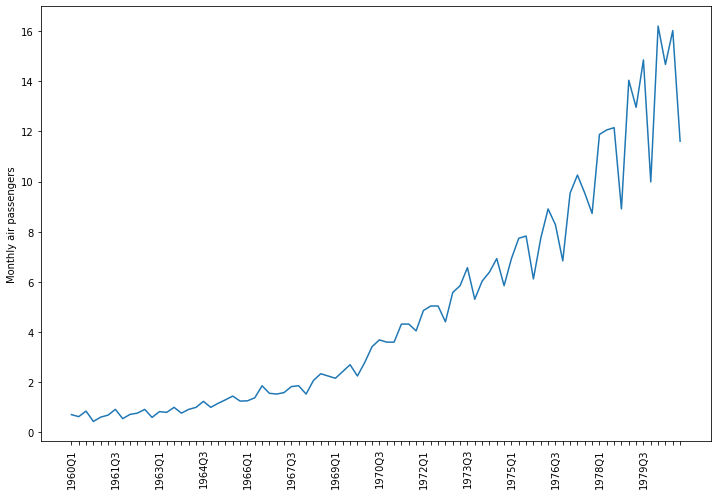

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(data['date'],data['data'])
plt.xticks(rotation = 90,size=10)
plt.ylabel('Monthly air passengers')
every_nth = 6
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()

We will model the data using the "parsimony principle", i.e. choosing the order of the processes in $SARIMA(p,d,q,P,D,Q)_S$ in such a way that:

$p+d+q+P+D+Q\le 6$

to avoid overfitting.

In the time series we can notice that the variance is not constant and we have heteroskedasticity. We observe also a seasonality with a quarterly periodicity. We first transform the data taking the logarithm to stabilize the variance, and then we apply differencing  once (corresponding to d=1) to obtain the log return:

$r_t=log\big(\frac{X_t}{X_{t-1}}\big)$

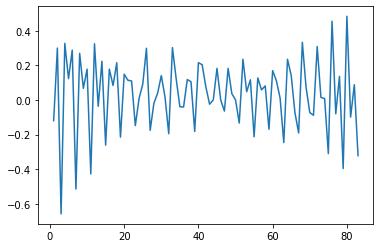

In [ ]:
from statsmodels.tsa.statespace.tools import diff
tslog = np.log(data['data'])
logret= diff(tslog)
plt.plot(logret)
plt.show()

We also plot ACF and PACF:

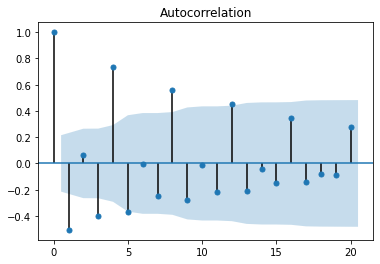

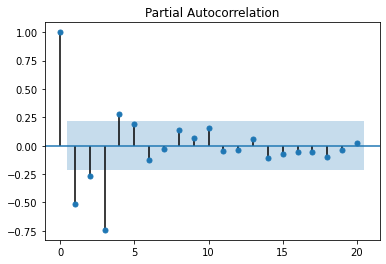

In [ ]:
plot_acf(logret)
plot_pacf(logret)
plt.show()

We can observe strong autocorrelations at lags 4,8,12 (multiples of 4) due to quarterly seasonality.
If we apply differencing again for seasonality (D=1), taking account a seasonality S=4, to have a stationary time series:

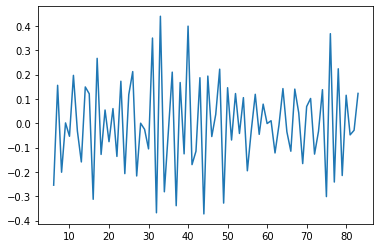

In [ ]:
slogret= diff(diff(tslog),k_seasonal_diff=1,seasonal_periods=4)
plt.plot(slogret)
plt.show()

We apply the Ljung-Box test:

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
m = int(np.log(data.shape[0]))

acorr_ljungbox(slogret, lags=[m])

(array([47.49569559]), array([1.20220404e-09]))

The p-value is very small, we reject the hypothesis that there is no autocorrelation between previous lags. We look again at the ACF and PACF:

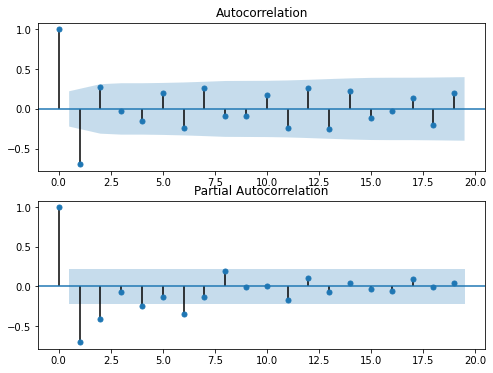

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(8,6))
plot_acf(slogret,ax=ax[0])
plot_pacf(slogret,ax=ax[1])
plt.show()

The ACF suggest a MA order equal to 1, the PACF also suggest an AR process of order p=1. We try to consider several models with:

* q = 0,1 Q=0,1
* p = 0,1 P=0,1
* d= 1, D=1, S=4

We use AIC,SSE and Ljung-Box test applied to the residuals to choose the best model. We apply the model to the logarithm of the process.

In [ ]:
import statsmodels.api as sm
pp = []
qq = []
PP = []
QQ = []
aic = []
lb = []
sse = []
for p in range(0,2):
    for q in range(0,2):
        for P in range(0,2):
            for Q in range(0,2):
                model=sm.tsa.statespace.SARIMAX(np.log(data['data']),order=(p, 1, q),seasonal_order=(P,1,Q,4))
                res = model.fit()
                pp.append(p)
                qq.append(q)
                PP.append(P)
                QQ.append(Q)
                aic.append(res.aic)
                lb.append(acorr_ljungbox(res.resid, lags=[m]))
                sse.append((res.resid**2).sum())

resdf = pd.DataFrame()
resdf['p']=pp
resdf['q']=qq
resdf['PP']=PP
resdf['QQ']=QQ
resdf['AIC']=aic
resdf['lb-p-value']=lb
resdf['sse']=sse

In [ ]:
resdf

,p,q,PP,QQ,AIC,lb-p-value,sse
0,0,0,0,0,-124.068515,"([25.87009039885298], [3.3611634202273556e-05])",1.840592
1,0,0,0,1,-126.349277,"([22.465827813553645], [0.00016185920160728155])",1.793068
2,0,0,1,0,-125.919798,"([22.981427419110773], [0.00012771258550031323])",1.797806
3,0,0,1,1,-124.364826,"([22.457989878541394], [0.00016244270988769062])",1.792984
4,0,1,0,0,-145.514048,"([11.082408207317567], [0.025653305624299585])",1.620687
5,0,1,0,1,-150.752935,"([9.973453198179065], [0.040877241475385795])",1.560383
6,0,1,1,0,-150.913569,"([10.379334351347172], [0.03450034832950877])",1.559889
7,0,1,1,1,-149.131838,"([10.136786070481618], [0.03818550811524524])",1.558106
8,1,0,0,0,-139.824859,"([13.325766859535749], [0.009789008640943031])",1.662100
9,1,0,0,1,-146.019124,"([9.926289500405524], [0.04168779972077175])",1.593303


We choose the model on the basis of the lowest AIC value, the smallest SSE and the highest p-value of the Ljung Box test, which means that there is small autocorrelation left on the rsiduals. Good models are the 6th, 7th, 9th, 11th, 13th, 14th and 15th. Among those, we exclude the models with the highest orders, so we stay with models 6th and 9th, corresponding to $SARIMA(0,1,1,1,1,0)_4$ and $SARIMA(1,1,0,0,1,1)_4$. Let's use the first:

In [ ]:
model=sm.tsa.statespace.SARIMAX(np.log(data['data']),order=(0, 1, 1),seasonal_order=(1,1,0,4))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                              data   No. Observations:                   84
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 4)   Log Likelihood                  78.457
Date:                           Tue, 12 Apr 2022   AIC                           -150.914
Time:                                   17:41:51   BIC                           -143.805
Sample:                                        0   HQIC                          -148.066
                                            - 84                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6797      0.096     -7.107      0.000      -0.867      -0.492
ar.S.L4       -0.3219      0.108     -2.970      0.003      -0.534      -0.110
sigma2         0.0079      0.002      5.150      0.000       0.005       0.011
===================================================================================
Ljung-Box (Q):                       36.29   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.64   Prob(JB):                         0.45
Heteroskedasticity (H):               0.45   Skew:                             0.08
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

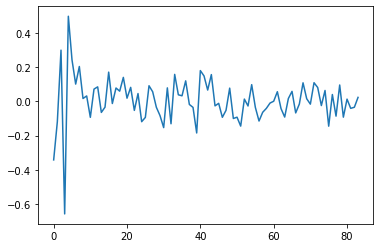

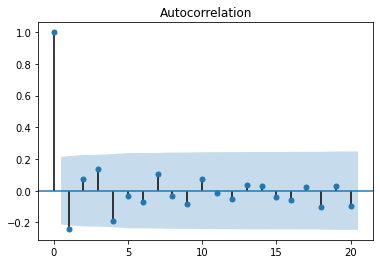

In [ ]:
plt.plot(res.resid)
plot_acf(res.resid)
plt.show()

We can also make a forecast for the future quarters:

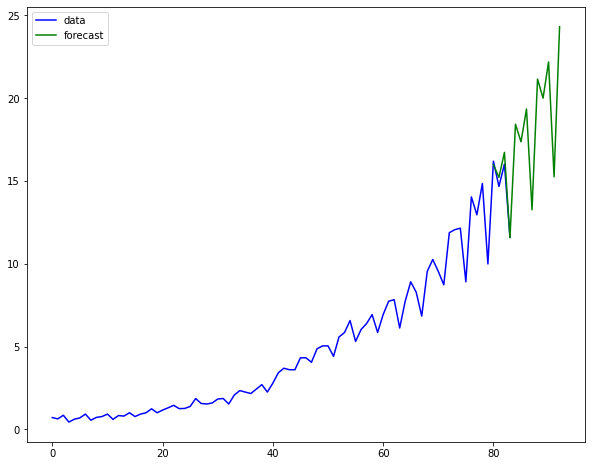

In [ ]:
import seaborn as sns
forecast=np.exp(res.predict(start=80,end=92,signal_only=True,dynamic=True))

fig,ax = plt.subplots(figsize=(10,8))
ax.plot(data.index,data['data'],label='data',color='blue')
ax.plot(forecast,label='forecast',color='green')
plt.legend()
plt.show()